# **Package**

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
nltk.download('punkt')  
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('dataset/train.csv')

# **1.Understanding The Data**

In [4]:
df.shape

(159572, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159572 entries, 0 to 159571
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159572 non-null  object
 1   comment_text   159572 non-null  object
 2   toxic          159572 non-null  int64 
 3   severe_toxic   159572 non-null  int64 
 4   obscene        159572 non-null  int64 
 5   threat         159572 non-null  int64 
 6   insult         159572 non-null  int64 
 7   identity_hate  159572 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [7]:
df.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0
159571,fffasdsddasdadss,my mother,0,0,0,0,0,0


In [8]:
df.tail(100)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159472,fe6585aaa6182d28,You ignored him too,0,0,0,0,0,0
159473,fe77e59403ac395e,", as User:Dr.K wasn't saying it in the article",0,0,0,0,0,0
159474,fe7b1f2bd3756b0b,"LaserActive \n\nHi SchuminWeb, I am confused b...",0,0,0,0,0,0
159475,fe93b5e609f5cfdd,Lists of Islamic Jihads,0,0,0,0,0,0
159476,fea196598389c77c,"""\n\n URL Update (update to my previous, and o...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [9]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159572.000000,159572.000000,159572.000000,159572.000000,159572.000000,159572.000000
mean,0.095844,0.009995,0.052948,0.002996,0.049363,0.008805
std,0.294378,0.099477,0.223930,0.054649,0.216626,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **2.Preprocessing The Data**

In [10]:
df.dropna(inplace=True)

#### Xóa các kí tự đặt biệt và thay thế \n bằng khoảng trống

In [11]:
def remove_special_characters(text):
    text = text.replace('\n', ' ')
    text = re.sub(r"[^A-Za-z0-9\s\.'']", '', text)
    return text


In [12]:
df['comment_text'] = df['comment_text'].apply(remove_special_characters)

#### Xóa các stopword 

In [13]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
def remove_stopwords_and_numbers(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS and not re.match(r'.*\d.*', word)]
    new_text = ' '.join(filtered_words)
    return new_text
df['comment_text'] = df['comment_text'].apply(remove_stopwords_and_numbers)

#### Xóa cột không cần thiết

In [14]:
df = df.drop(columns=['id'])

#### Chuyển tất cả dữ liệu về chữ thường

In [15]:
df['comment_text'] = df['comment_text'].apply(lambda x: x.lower() if isinstance(x, str) else x)

#### Stemming 

In [16]:
stemmer = PorterStemmer()

#### Lemmatization  

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)  
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] 
    return ' '.join(lemmatized_tokens)  

In [19]:
stemmer = PorterStemmer()

In [20]:
df['comment_text'] = df['comment_text'].apply(lemmatize_sentence)

In [21]:
file_path_clean = 'dataset/train_clean.csv'
df.to_csv(file_path_clean, index=False)

## **3.Chart**

In [22]:
import matplotlib.pyplot as plt

#### Biểu đồ thống kê tỉ lệ % giữa các nhãn

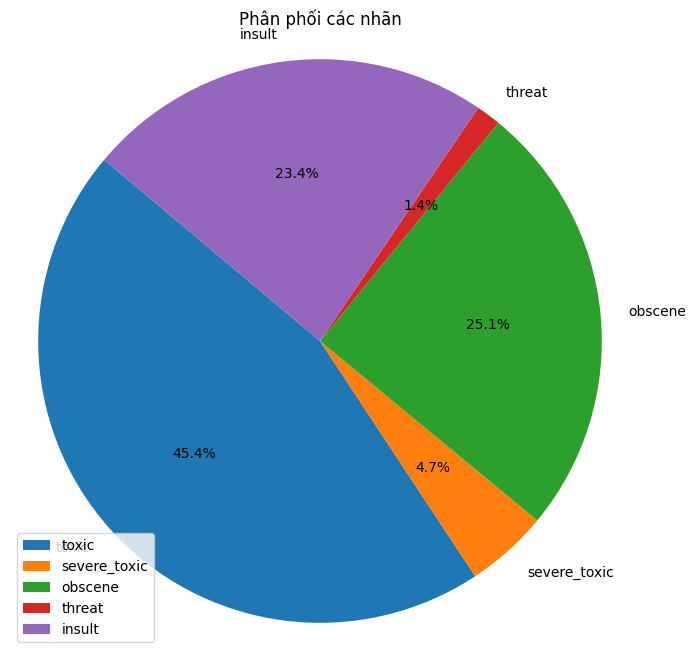

In [23]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
sizes = [sum(df[label]) for label in labels] 
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Phân phối các nhãn')
plt.legend()
plt.show()

#### Biểu đồ tần số xuất hiện theo độ dài comment

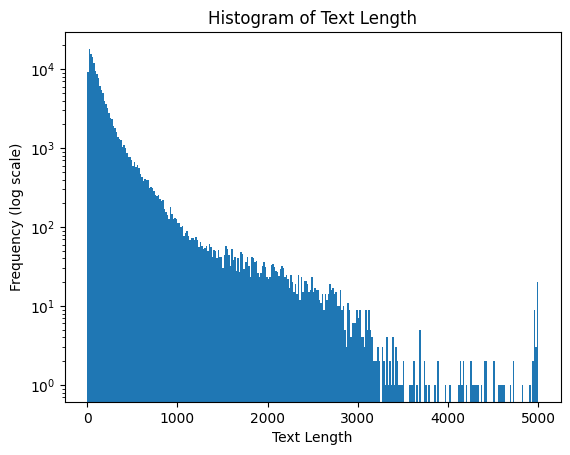

In [24]:
plt.hist(df['comment_text'].str.len(), bins=300, log=True)
plt.title('Histogram of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency (log scale)')
plt.show()

#### Biểu đồ thống kê xem có sự mất cân bằng giữa các nhãn hay không

array([[<Axes: title={'center': 'toxic'}>,
        <Axes: title={'center': 'severe_toxic'}>],
       [<Axes: title={'center': 'obscene'}>,
        <Axes: title={'center': 'threat'}>],
       [<Axes: title={'center': 'insult'}>,
        <Axes: title={'center': 'identity_hate'}>]], dtype=object)

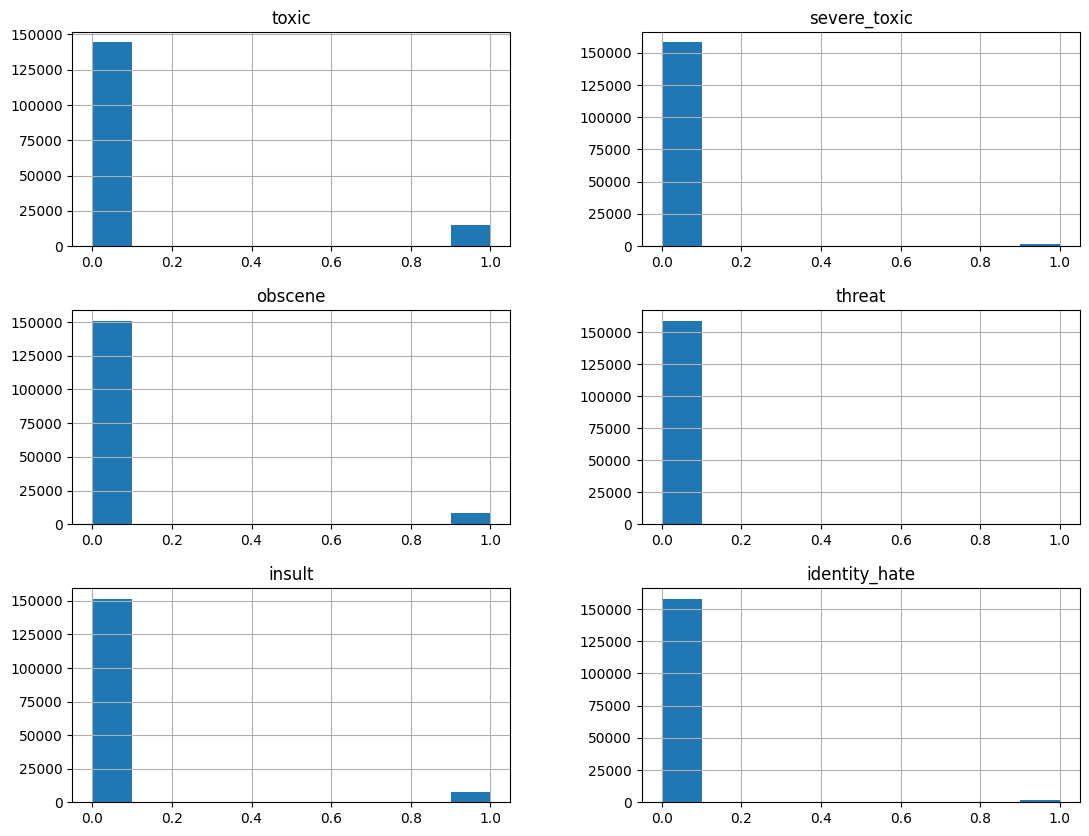

In [25]:
df.hist(figsize=(13,10))

#### Biểu đồ xem tần số xuất hiện mỗi loại 

<Axes: title={'center': 'Labels Frequency'}>

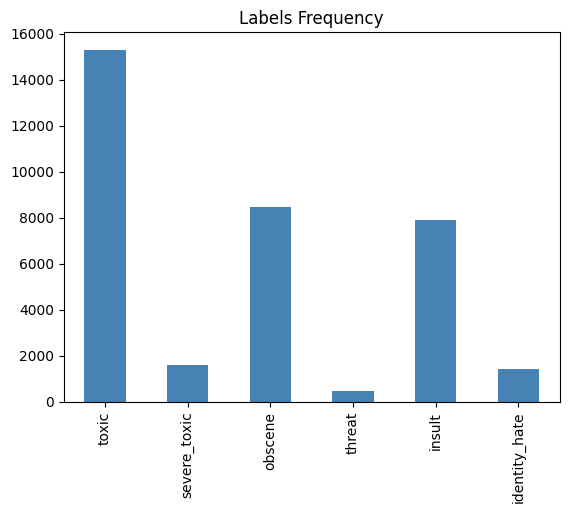

In [26]:
train_labels = df[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

#### Ma trận tương quan

<Axes: >

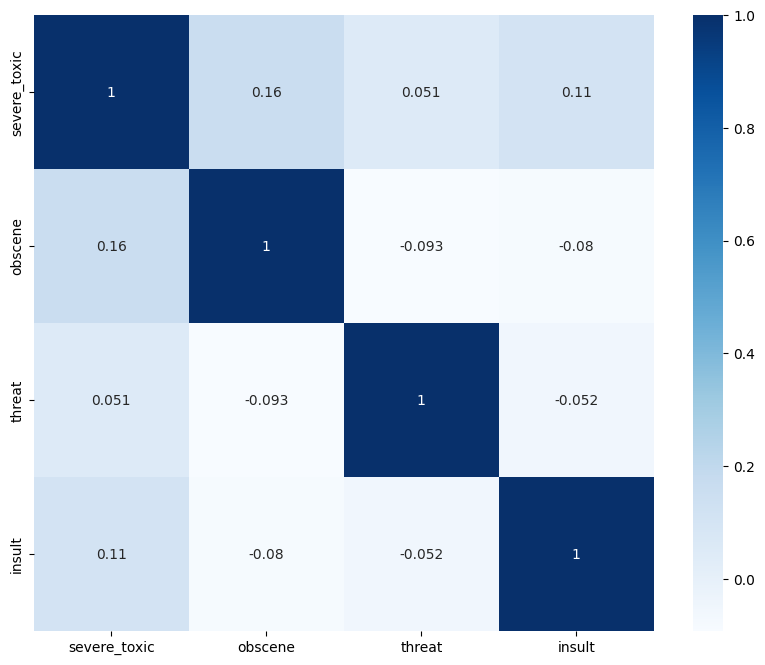

In [27]:
rowsums = df.iloc[:, 2:].sum(axis=1)
temp = df.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

# **4.Creating A TF-IDF Model**

### **4.1 Split data**

In [28]:
df = pd.read_csv('dataset/train_clean.csv')

In [29]:
df = df.dropna()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification

In [31]:
x = df['comment_text']
y = df.drop(columns=['comment_text'], axis=1)

In [32]:
print(x)
print(y)

0         explanation edits username hardcore metallica ...
1         d'aww match background colour seemingly stuck ...
2         hey man edit war . guy constantly removing rel...
3         real suggestion improvement wondered statistic...
4                                sir hero . chance remember
                                ...                        
159567                   ashamed horrible thing talk page .
159568    spitzer umm actual article prostitution ring ....
159569                          speedy version deleted it .
159570    ... understand . idea bad away . kind communit...
159571                                               mother
Name: comment_text, Length: 159090, dtype: object
        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0     

In [33]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.25, random_state=42)

### **4.2 Transforming Text to Vectors**

In [34]:
import pickle

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [36]:
with open('train/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [37]:
print(tfidf_vectorizer.get_feature_names_out())
with open("tfidf_features.txt", "w") as f:
    f.write("Features:\n")
    for feature in tfidf_vectorizer.get_feature_names_out():
        f.write(feature + "\n")
    f.write("\nTF-IDF Array:\n")

['ability' 'abortion' 'about' ... 'youth' 'youtube' 'ytmndin']


## **5.Applying Logistic Regression Model**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

#### Huấn luyện mô hình

In [45]:
clf = OneVsRestClassifier(LogisticRegression(solver='liblinear', C=0.1,penalty='l1',max_iter=100))
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=0.1, penalty='l1',
                                                 solver='liblinear'))

#### Đánh giá mô hình

In [46]:
y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.


In [47]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report) 

Accuracy: 0.9159731476127021
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.55      0.69      3783
           1       0.53      0.20      0.29       410
           2       0.92      0.63      0.75      2123
           3       0.45      0.07      0.13       123
           4       0.80      0.48      0.60      1955
           5       0.69      0.20      0.31       364

   micro avg       0.87      0.52      0.65      8758
   macro avg       0.72      0.35      0.46      8758
weighted avg       0.86      0.52      0.64      8758
 samples avg       0.05      0.04      0.04      8758



In [48]:
with open('train/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# **5. CHART**

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.


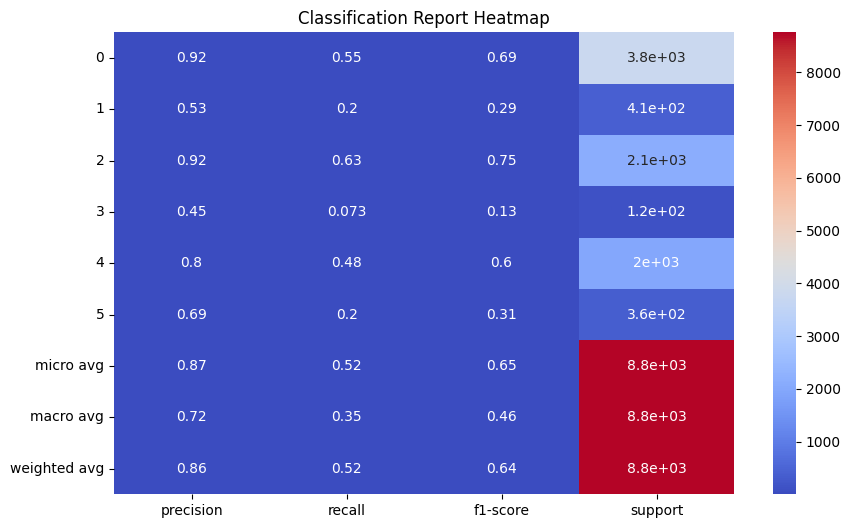

In [49]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.


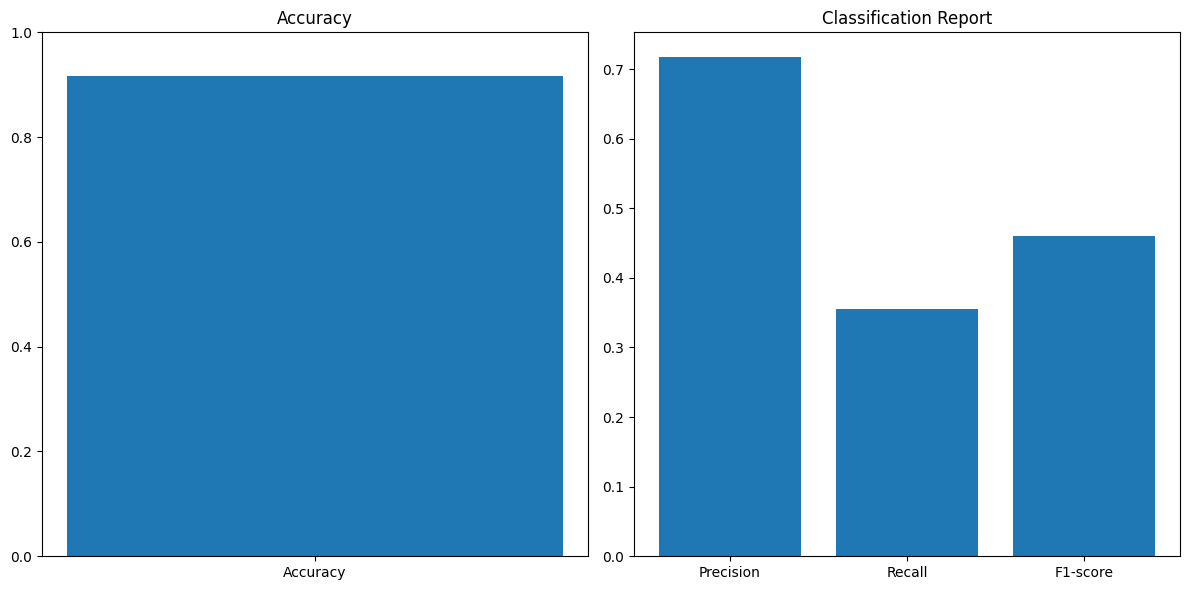

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Đoạn mã để tạo và huấn luyện mô hình đã được cung cấp

# Vẽ biểu đồ
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Biểu đồ dự đoán
axes[0].bar(['Accuracy'], [accuracy])
axes[0].set_title('Accuracy')
axes[0].set_ylim(0, 1)

# Biểu đồ báo cáo đánh giá
report_dict = classification_report(y_test, y_pred, output_dict=True)
precision = [report_dict['macro avg']['precision']]
recall = [report_dict['macro avg']['recall']]
f1 = [report_dict['macro avg']['f1-score']]
axes[1].bar(['Precision', 'Recall', 'F1-score'], [precision[0], recall[0], f1[0]])
axes[1].set_title('Classification Report')

plt.tight_layout()
plt.show()
